# Speaker Vector Nemo

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/speaker-vector-nemo](https://github.com/huseinzol05/malaya-speech/tree/master/example/speaker-vector-nemo).
    
</div>

<div class="alert alert-info">

This module is language independent, so it save to use on different languages. Pretrained models trained on multilanguages.
    
</div>

<div class="alert alert-info">

Does not required to install Nvidia Nemo, Malaya-Speech already exported necessary code and models only.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
from malaya_speech import Pipeline
import malaya_speech
import numpy as np

`pyaudio` is not available, `malaya_speech.streaming.pyaudio_vad.stream` is not able to use.


In [3]:
import logging

logging.basicConfig(level=logging.INFO)

### List available Nemo models

In [5]:
malaya_speech.speaker_vector.available_nemo()

INFO:malaya_speech.speaker_vector:tested on VoxCeleb2 test set. Lower EER is better.
INFO:malaya_speech.speaker_vector:download the test set at https://github.com/huseinzol05/malaya-speech/tree/master/data/voxceleb


,Size (MB),Embedding Size,EER,original from
huseinzol05/nemo-ecapa-tdnn,96.8,192,0.02492,https://catalog.ngc.nvidia.com/orgs/nvidia/tea...
huseinzol05/nemo-speakernet,23.6,192,0.04279,https://catalog.ngc.nvidia.com/orgs/nvidia/tea...
huseinzol05/nemo-titanet_large,101.6,192,0.02278,https://catalog.ngc.nvidia.com/orgs/nvidia/tea...


**Smaller EER the better model is**.

### Load Nemo model

```python
def nemo(
    model: str = 'huseinzol05/nemo-ecapa-tdnn',
    **kwargs,
):
    """
    Load Nemo Speaker verification model.

    Parameters
    ----------
    model : str, optional (default='huseinzol05/nemo-ecapa-tdnn')
        Check available models at `malaya_speech.speaker_vector.available_nemo()`.

    Returns
    -------
    result : malaya_speech.torch_model.nemo.Model class
    """
```

In [4]:
model = malaya_speech.speaker_vector.nemo('huseinzol05/nemo-ecapa-tdnn')

INFO:malaya_boilerplate.huggingface:downloading frozen huseinzol05/nemo-ecapa-tdnn/model_config.yaml
INFO:malaya_boilerplate.huggingface:downloading frozen huseinzol05/nemo-ecapa-tdnn/model_weights.ckpt
INFO:malaya_speech.utils.nemo_featurization:PADDING: 16


In [5]:
from glob import glob

speakers = ['speech/example-speaker/khalil-nooh.wav',
'speech/example-speaker/mas-aisyah.wav',
'speech/example-speaker/shafiqah-idayu.wav',
'speech/example-speaker/husein-zolkepli.wav'
           ]

### Pipeline

In [6]:
def load_wav(file):
    return malaya_speech.load(file)[0]

p = Pipeline()
frame = p.foreach_map(load_wav).map(model)

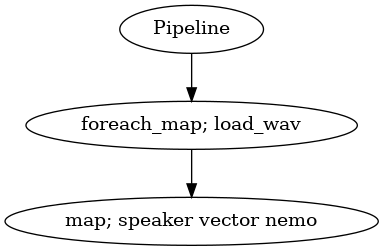

In [7]:
p.visualize()

In [8]:
r = p(speakers)

### Calculate similarity

In [11]:
from scipy.spatial.distance import cdist

1 - cdist(r['speaker-vector-nemo'], r['speaker-vector-nemo'], metric = 'cosine')

array([[ 1.        , -0.30169573, -0.33176271, -0.24950222],
       [-0.30169573,  1.        , -0.39778761, -0.39475821],
       [-0.33176271, -0.39778761,  1.        , -0.30796176],
       [-0.24950222, -0.39475821, -0.30796176,  1.        ]])

Remember, our files are,

```python
['speech/example-speaker/khalil-nooh.wav',
 'speech/example-speaker/mas-aisyah.wav',
 'speech/example-speaker/shafiqah-idayu.wav',
 'speech/example-speaker/husein-zolkepli.wav']
```